In [4]:
import json
import os
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import tarfile
import pickle
import numpy as np
from tqdm import tqdm
import cv2
from PIL import Image

path = "tsinghuaDaimlerDataset"

In [67]:
#extract images or labels
# open file
file = tarfile.open('tsinghuaDaimlerDataset/tdcb_leftImg8bit_train.tar.gz')
# extracting file
file.extractall('tsinghuaDaimlerDataset/images_full/test/')
file.close()

KeyboardInterrupt: 

In [69]:
# create bbox from label
def create_bbox(path) : 
    for _, _, fnames in sorted(os.walk(path+"/label/labelData/train/tsinghuaDaimlerDataset/")): #for each folder
        for fname in fnames[1500:2000] :
            with open("tsinghuaDaimlerDataset/label/labelData/train/tsinghuaDaimlerDataset/"+fname) as json_file:
                im = json.load(json_file)
            bbox = {"y": im["children"][0]["minrow"], "x": im["children"][0]["mincol"], "w": (im["children"][0]["maxcol"]), "h": im["children"][0]["maxrow"]}
            with open(path +"/images_aligned/bbox/test/"+ os.path.splitext(im["imagename"])[0]+".json", "w") as outfile:
                json.dump(bbox, outfile)
create_bbox(path)

tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.png


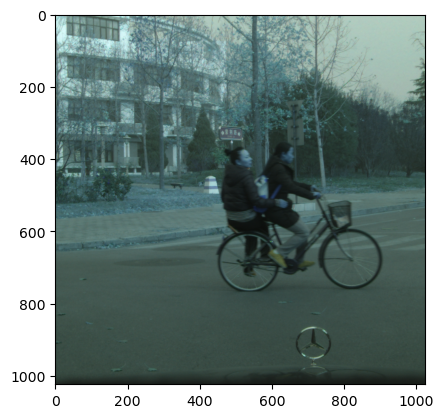

In [9]:
#crop image and modify bbox

for _, _, fnames in sorted(os.walk(path + "/images_new/images/train/real/")): #for each folder
    for fname in fnames :
        print(fname)
        AB = Image.open("tsinghuaDaimlerDataset/images_new/images/train/real/"+ fname).convert('RGB')
        width, height = AB.size
        left = int((width - height) / 2)
        right = left + height
        im1 = AB.crop((left, 0, right, height))
        im1.save("tsinghuaDaimlerDataset/images_new/images/train/real/"+ fname)
        AB = cv2.imread("tsinghuaDaimlerDataset/images_new/images/train/real/"+fname,1)
        plt.imshow(AB)

        with open("tsinghuaDaimlerDataset/images_new/bbox/test/"+ os.path.splitext(fname)[0] + ".json" ) as json_file:
            bbox = json.load(json_file)

        bbox2 = {"y": bbox["y"], "x": bbox["x"]-left, "w": bbox["w"]-left, "h": bbox["h"]}
        if bbox2["x"]>= 1024 and bbox2["w"] >= 1024 :
            bbox2["x"] = 1024
            bbox2["w"] = 1024 
        if bbox2["x"]<= 1024 and bbox2["w"] > 1024 :
            bbox2["w"] = 1024 
        if bbox2["x"] <0 :
            bbox2["x"] =0
        if bbox2["w"] <0 :
            bbox2["w"] =0
        #with open("tsinghuaDaimlerDataset/images_new/bbox/test/"+ os.path.splitext(fname)[0] +".json", "w") as outfile:
            #json.dump(bbox2, outfile)

In [72]:
#select only cyclist large enought
for _, _, fnames in sorted(os.walk(path + "/images_aligned_crop/images/test/")): #for each folder
    for fname in fnames[0:1000]:

        with open("tsinghuaDaimlerDataset/images_aligned_crop/bbox/test/"+ os.path.splitext(fname)[0] + ".json" ) as json_file:
            bbox = json.load(json_file)
        h = 512
        w_total = 512*2
        size_y = 1024
        size_x = 1024 *2
        size_bbox = [int(bbox["h"]*h/size_y)-int(bbox["y"]*h/size_y), int(bbox["w"]*w_total/size_x)-int(bbox["x"]*w_total/size_x)] 

        if size_bbox[0]<48 or size_bbox[1]<48 :
            print(size_bbox)
            os.remove("tsinghuaDaimlerDataset/images_aligned_crop/bbox/test/"+ os.path.splitext(fname)[0] + ".json")
            os.remove(path + "/images_aligned_crop/images/test/"+ fname)



[51, 17]
[51, 18]
[62, 22]
[66, 26]
[38, 15]
[39, 15]
[40, 16]
[41, 16]
[40, 16]
[40, 15]
[40, 14]
[41, 16]
[43, 17]
[49, 18]
[52, 20]
[57, 23]
[63, 25]
[69, 25]
[78, 29]
[102, 21]
[122, 0]
[63, 0]
[95, 23]
[263, 0]
[288, 0]
[31, 13]
[34, 12]
[44, 17]
[49, 21]
[55, 21]
[62, 25]
[42, 16]
[51, 20]
[92, 35]
[85, 39]
[124, 27]
[151, 0]
[40, 0]
[45, 25]
[62, 25]
[78, 30]
[43, 28]
[42, 21]
[54, 21]
[87, 31]
[234, 0]
[72, 34]
[62, 33]
[73, 46]
[93, 43]
[31, 0]
[34, 14]
[39, 16]
[45, 18]
[93, 0]
[43, 19]
[51, 22]
[61, 28]
[74, 2]
[47, 24]
[72, 39]
[57, 6]
[90, 45]
[55, 24]
[70, 34]
[126, 0]
[204, 0]
[258, 0]
[33, 15]
[47, 16]
[38, 18]
[41, 16]
[62, 22]
[48, 19]
[53, 21]
[127, 0]
[175, 0]
[44, 45]
[58, 36]
[69, 0]
[40, 16]
[56, 20]
[84, 0]
[54, 22]
[75, 29]
[91, 35]
[49, 0]
[51, 19]
[78, 0]
[87, 0]
[98, 0]
[70, 24]
[76, 27]
[84, 30]
[96, 32]
[110, 37]
[128, 43]
[38, 14]
[37, 0]
[39, 0]
[38, 0]
[37, 0]
[37, 15]
[40, 15]
[41, 15]
[43, 16]
[45, 17]
[48, 18]
[50, 19]
[53, 20]
[55, 22]
[59, 23]
[65,

In [23]:
with open("tsinghuaDaimlerDataset/images_aligned_crop/bbox/train/tsinghuaDaimlerDataset_2014-11-20_074640_000001490_leftImg8bit.json" ) as json_file:
    bbox = json.load(json_file)
    print(bbox)
h = 286
w_total = 286*2
size_y = 1024
size_x = 1024 *2
size_bbox = [int(bbox["h"]*h/size_y)-int(bbox["y"]*h/size_y), int(bbox["w"]*w_total/size_x)-int(bbox["x"]*w_total/size_x)]
print(size_bbox) 


{'y': 376, 'x': 1012, 'w': 1097, 'h': 605}
[63, 24]


(1024, 4096, 3)


FileNotFoundError: [Errno 2] No such file or directory: 'tsinghuaDaimlerDataset/images_aligned/images/train/tsinghuaDaimlerDataset_2014-11-20_075523_000008404_leftImg8bit.json'

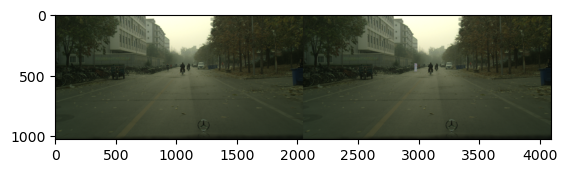

In [36]:
#add noise trials

image = mpimg.imread("tsinghuaDaimlerDataset/images_aligned/images/train/tsinghuaDaimlerDataset_2014-11-20_075523_000008404_leftImg8bit.png")
plt.imshow(image)
print(image.shape)

with open("tsinghuaDaimlerDataset/images_aligned/images/train/tsinghuaDaimlerDataset_2014-11-20_075523_000008404_leftImg8bit.json") as json_file:
    bbox = json.load(json_file)
print(bbox)

roi = image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] 
noise = np.random.randint(0, 2, roi.shape, dtype=np.uint8)
image_noise = image
image_noise[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] = noise

plt.imshow(image_noise)
plt.show()

print(image.shape)


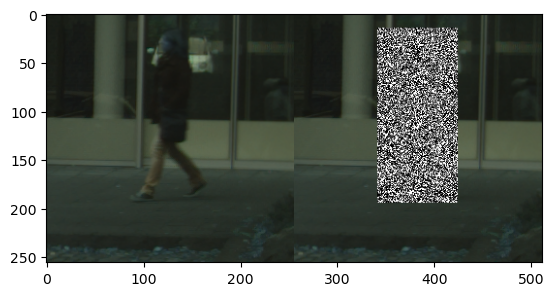

In [142]:
image = cv2.imread("1.png",1)
plt.imshow(image)

In [143]:
with open("1.json" ) as json_file:
    bbox = json.load(json_file)
print(bbox)

{'y': 15, 'x': 86, 'w': 169, 'h': 195}


(180, 83, 3)
(180, 83, 3)


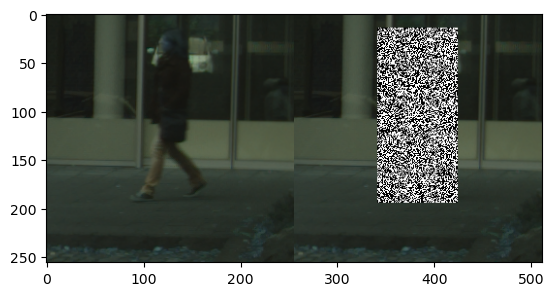

True

In [149]:
roi = image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] 
print(roi.shape)
noise = np.random.randint(0, 2, size=[roi.shape[0],roi.shape[1]])
noise = np.where (noise ==1,255,0)
noise = np.repeat(noise[:, :, np.newaxis], 3, axis=2)
print(noise.shape)
image_noise = image
image_noise[bbox["y"]:bbox["h"], bbox["x"]+256:bbox["w"]+256] = noise

plt.imshow(image_noise)
plt.show()




In [150]:
cv2.imwrite("tsinghuaDaimlerDataset/2.png", image_noise)

True

{'y': 356, 'x': 446, 'w': 906, 'h': 770}
99 124 253 215


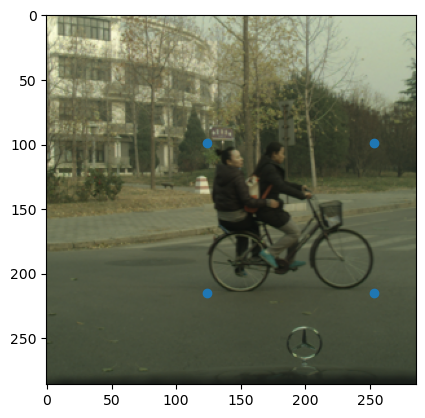

In [13]:
#resizing trials

AB = Image.open("tsinghuaDaimlerDataset/images_new/images/train/real/tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.png").convert('RGB')
AB = AB.resize((286, 286), Image.BICUBIC)
with open("tsinghuaDaimlerDataset/images_new/bbox/train/tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.json" ) as json_file:
    bbox = json.load(json_file)
print(bbox)

x = int((bbox["x"] * 286) /1024)
y = int((bbox["y"] * 286) /1024)
w = int(bbox["w"] * 286 /1024)
h = int(bbox["h"] * 286 /1024)

bbox2 = {"y": y, "x": x, "w": w, "h": h}

print(y,x,w,h)

plt.imshow(AB)
plt.scatter ( x = [x,x,w,w], y = [y,h,y,h])
plt.show()

with open("tsinghuaDaimlerDataset/images_new/bbox/train/"+ os.path.splitext(fname)[0] +".json", "w") as outfile:
    json.dump(bbox2, outfile)

AB.save("tsinghuaDaimlerDataset/images_new/images/train/real/"+ fname)

{'y': 99, 'x': 124, 'w': 253, 'h': 215}


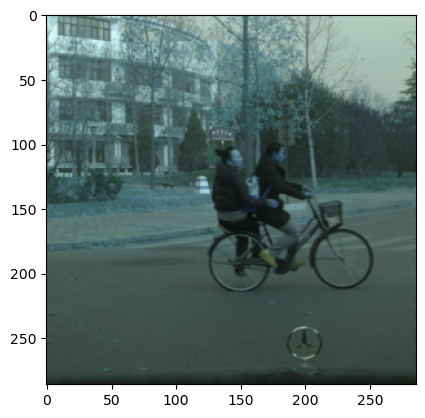

In [15]:
AB = cv2.imread("tsinghuaDaimlerDataset/images_new/images/train/real/tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.png",1)
plt.imshow(AB)

with open("tsinghuaDaimlerDataset/images_new/bbox/train/tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.json" ) as json_file:
    bbox = json.load(json_file)
print(bbox)

In [85]:
def select_square_around_plastic (image_path,bbox_path,image_path_save, bbox_path_save,size) :
    for _, _, fnames in sorted(os.walk(image_path)): #for each folder
        for fname in fnames[251:253] :
            print(fname)
            AB = Image.open(image_path+ fname).convert('RGB')
            width, height = AB.size
            with open(bbox_path+ os.path.splitext(fname)[0] + ".json" ) as json_file:
                bbox = json.load(json_file)
            size_bbox = [bbox["h"]-bbox["y"], bbox["w"]-bbox["x"]]
            print("size_bbox",size_bbox)

            if size_bbox[0] > size or size_bbox[1] > size :
                print("bbox too large")
                AB = AB.resize((int(width/2),int(height/2)), Image.BICUBIC)
                bbox = {"y": int(bbox["y"]/2), "x": int(bbox["x"]/2), "w": int(bbox["w"]/2), "h": int(bbox["h"]/2)}
                size_bbox = [bbox["h"]-bbox["y"], bbox["w"]-bbox["x"]]
                width, height = AB.size
            print("bbox",bbox)
            print("size_bbox",size_bbox)

            left = bbox["x"]+int(size_bbox[1]/2-size/2)
            top = bbox["y"]+int(size_bbox[0]/2+size/2)
            right = bbox["x"]+int(size_bbox[1]/2+size/2)
            bottom = bbox["y"]+int(size_bbox[0]/2-size/2)

            print("coor",left, top,right,bottom)
            if left <0 :
                print("1")
                diff = 0-left
                left = 0
                right = right + diff
            if right > width :
                print("2")
                diff = right -width
                right = width
                left = left - diff
            if top > height :
                print("3")
                diff = top -height
                top = height
                bottom = bottom - diff
            if bottom <0 :
                print("4")
                diff = 0 - bottom
                bottom = 0
                top = top + diff
            
            print("coor",left, top,right,bottom)

            AB = AB.crop((left,bottom,right,top))

            AB.save(image_path_save+ fname)

            bbox2 = {"y": bbox["y"]-bottom, "x": bbox["x"]-left, "w": bbox["w"]-left, "h": bbox["h"]-bottom}
            print("bbox",bbox2)

            plt.imshow(AB)
            plt.scatter (x= [bbox2["x"],bbox2["x"],bbox2["w"],bbox2["w"]], y=[bbox2["y"],bbox2["h"],bbox2["y"],bbox2["h"]])
            plt.show()
            
            with open(bbox_path_save+ os.path.splitext(fname)[0] +".json", "w") as outfile:
                json.dump(bbox2, outfile)

tsinghuaDaimlerDataset_2014-11-20_074640_000003380_leftImg8bit.png
size_bbox [213, 83]
bbox {'y': 375, 'x': 437, 'w': 520, 'h': 588}
size_bbox [213, 83]
coor 351 609 606 354
coor 351 609 606 354
bbox {'y': 21, 'x': 86, 'w': 169, 'h': 234}


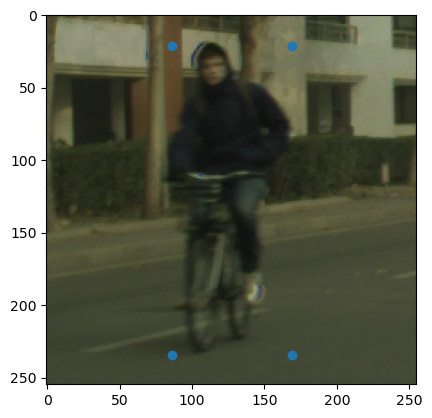

tsinghuaDaimlerDataset_2014-11-20_074640_000003390_leftImg8bit.png
size_bbox [358, 170]
bbox too large
bbox {'y': 179, 'x': 10, 'w': 95, 'h': 358}
size_bbox [179, 85]
coor -75 396 180 141
1
coor 0 396 255 141
bbox {'y': 38, 'x': 10, 'w': 95, 'h': 217}


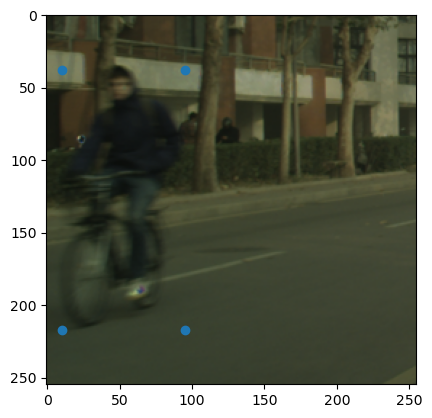

In [86]:
select_square_around_plastic ("tsinghuaDaimlerDataset/images_full/train/","tsinghuaDaimlerDataset/images_aligned/bbox/train/","tsinghuaDaimlerDataset/images_crop_bb/images/train/", "tsinghuaDaimlerDataset/images_crop_bb/bbox/train/",256)